### <b>실제 데이터 세트의 통계적 특성 분석하기</b>

* 딥러닝에서는 모델의 입력으로 데이터를 넣을 때, 사전에 전처리 과정을 거친다.
* 특히 <b>입력 정규화(input normalization)</b>는 현대 딥러닝 모델의 학습에 있어서 사용 빈도가 매우 높다.
  * 이를 위해 이미지의 <b>평균(mean)</b>, <b>표준 편차(standard deviation)</b>을 계산해야 하는 경우가 많다.
* 데이터 세트가 주어졌을 때, 통계적인 값을 계산해 보자.


In [ ]:
import torch
import torchvision.datasets as datasets
from torchvision import transforms

import numpy as np
import matplotlib.pyplot as plt

#### <b>이미지 정규화(Image Normalization)</b>

* 색상 이미지의 R, G, B 채널(channel) 각각에 대하여 평균을 0으로, 표준 편차를 1로 맞추어 주는 작업을 말한다.
  * 내가 가지고 있는 데이터 세트가 $N(0,1)$ 분포를 따르게 된다.
  * 입력 데이터를 정규화하여 <b>학습 속도(training speed)를 개선</b>할 수 있다.
* Normalize the data for each channel (R, G, B).
* 각각의 픽셀(pixel) 혹은 특징(feature)이 <b>비슷한 값의 범위</b>를 가지게 된다.
  * 이는 기울기(gradient) 값을 적절히 조절(control)할 수 있게 도와준다.
* 이미지 정규화 방법은 다음과 같다.
  1. <b>Subtracting</b> mean from the data → "center" the data.
  2. <b>Dividing</b> the centered data by the standard deviation of that features → "normalize" each feature to a z-score.

In [ ]:
# CIFAR-10 데이터 세트 불러오기
train_dataset = datasets.CIFAR10(
    root="./data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

# 모든 이미지를 하나씩 확인하기
imgs = []
labels = []
for data in train_dataset:
    img, label = data
    imgs.append(img)
    labels.append(label)

print(f"The number of images: {len(imgs)}")
print(f"The number of labels: {len(labels)}")
print(f"The shape of an image: {imgs[0].shape}")

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
The number of images: 50000
The number of labels: 50000
The shape of an image: torch.Size([3, 32, 32])


In [ ]:
# 전체 데이터 세트를 NumPy 배열로 변환
numpy_imgs = torch.stack(imgs, dim=0).numpy()
print(f"The shape of the NumPy data array: {numpy_imgs.shape}")

# calculate mean over each channel (r, g, b)
mean_r = numpy_imgs[:,0,:,:].mean()
mean_g = numpy_imgs[:,1,:,:].mean()
mean_b = numpy_imgs[:,2,:,:].mean()

print(f"The mean of R: {mean_r}")
print(f"The mean of G: {mean_g}")
print(f"The mean of B: {mean_b}")

# calculate standard deviation over each channel (r, g, b)
std_r = numpy_imgs[:,0,:,:].std()
std_g = numpy_imgs[:,1,:,:].std()
std_b = numpy_imgs[:,2,:,:].std()

print(f"The std of R: {std_r}")
print(f"The std of G: {std_g}")
print(f"The std of B: {std_b}")

The shape of the NumPy data array: (50000, 3, 32, 32)
The mean of R: 0.4913996756076813
The mean of G: 0.48215827345848083
The mean of B: 0.4465312361717224
The std of R: 0.24703232944011688
The std of G: 0.24348504841327667
The std of B: 0.2615876793861389


#### <b>평균(Mean)과 표준 편차(Standard Deviation) 계산하기</b>

In [ ]:
def get_statistics(dataset):
    # 모든 이미지를 하나씩 확인하기
    imgs = []
    labels = []
    for data in dataset:
        img, label = data
        imgs.append(img)
        labels.append(label)
    
    # 전체 데이터 세트를 NumPy 배열로 변환
    numpy_imgs = torch.stack(imgs, dim=0).numpy()
    print(f"The shape of the NumPy data array: {numpy_imgs.shape}")
    
    # 회색(grayscale) 이미지인 경우
    if numpy_imgs.shape[1] == 1:
        return numpy_imgs[:,0,:,:].mean(), numpy_imgs[:,0,:,:].std()

    # calculate mean over each channel (r, g, b)
    mean_r = numpy_imgs[:,0,:,:].mean()
    mean_g = numpy_imgs[:,1,:,:].mean()
    mean_b = numpy_imgs[:,2,:,:].mean()
    
    # calculate standard deviation over each channel (r, g, b)
    std_r = numpy_imgs[:,0,:,:].std()
    std_g = numpy_imgs[:,1,:,:].std()
    std_b = numpy_imgs[:,2,:,:].std()
    
    return (mean_r, mean_g, mean_b), (std_r, std_g, std_b)


def imshow(img, grayscale=False):
    npimg = img.numpy()
    if grayscale:
        # (높이, 너비, 채널) 형태로 변환
        npimg = np.transpose(npimg, (1, 2, 0))
        # 흑백 이미지는 채널 차원 제거
        npimg = np.squeeze(npimg)
        plt.imshow(npimg, cmap="gray")
    else:
        # (높이, 너비, 채널) 형태로 변환
        npimg = np.transpose(npimg, (1, 2, 0))
        plt.imshow(npimg, cmap="gray")
    plt.show()

#### <b>CIFAR-10 데이터 세트</b>

* CIFAR-10은 <b>32 X 32 X 3의 해상도</b>의 사물 데이터를 모아 놓은 데이터 세트다.
* CIFAR-10 데이터 세트는 비행기(airplane), 자동차(automobile), 새(bird), 고양이(cat) 등 총 10개의 클래스로 구성된다.
* 학습 데이터는 50,000개이고, 테스트 데이터는 10,000개다.
* <b>Reference</b>: https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html

Files already downloaded and verified
Image example: torch.Size([3, 32, 32])


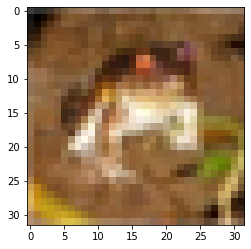

The shape of the NumPy data array: (50000, 3, 32, 32)
The mean of R: 0.4913996756076813
The mean of G: 0.48215827345848083
The mean of B: 0.4465312361717224
The std of R: 0.24703232944011688
The std of G: 0.24348504841327667
The std of B: 0.2615876793861389


In [ ]:
dataset = datasets.CIFAR10(
    root="./data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

img, label = dataset[0]
print(f"Image example: {img.shape}")
imshow(img, grayscale=False)

(mean_r, mean_g, mean_b), (std_r, std_g, std_b) = get_statistics(dataset)
print(f"The mean of R: {mean_r}")
print(f"The mean of G: {mean_g}")
print(f"The mean of B: {mean_b}")
print(f"The std of R: {std_r}")
print(f"The std of G: {std_g}")
print(f"The std of B: {std_b}")

#### <b>MNIST 데이터 세트</b>

* MNIST는 0부터 9까지의 숫자 이미지를 모아 놓은 데이터 세트다.
* <b>28 X 28 X 1의 해상도</b>를 가진다.
* <b>Reference</b>: https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



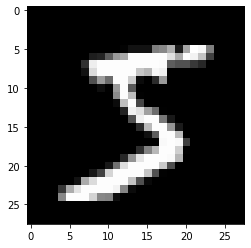

The shape of the NumPy data array: (60000, 1, 28, 28)
The mean: 0.13066062331199646
The std: 0.30810776352882385


In [ ]:
dataset = datasets.MNIST(
    root="./data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

img, label = dataset[0]
imshow(img, grayscale=True)

mean, std = get_statistics(dataset)
print(f"The mean: {mean}")
print(f"The std: {std}")

#### <b>Fashion-MNIST 데이터 세트</b>

* Fashion-MNIST에는 셔츠(shirt), 코트(coat), 가방(bag) 등 총 10개의 클래스(class)가 존재한다.
* <b>28 X 28 X 1의 해상도</b>를 가진다.
* <b>Reference</b>: https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



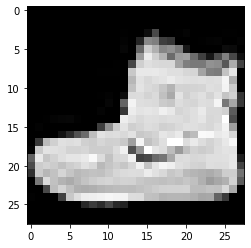

The shape of the NumPy data array: (60000, 1, 28, 28)
The mean: 0.28604018688201904
The std: 0.353023886680603


In [ ]:
dataset = datasets.FashionMNIST(
    root="./data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

img, label = dataset[0]
imshow(img, grayscale=True)

mean, std = get_statistics(dataset)
print(f"The mean: {mean}")
print(f"The std: {std}")